<a href="https://colab.research.google.com/github/IvanLudvig/ComputationalMaths/blob/master/sem2/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
z = 10
B = 50
L = 500
p0 = 100 * 1e5
p_inj = 150 * 1e5
p_prod = 50 * 1e5

k = 1e-14
mu = 1e-3
phi = 0.2

rho0 = 1000
cf = 1e-4 / 1e5
p_o = 120 * 1e5
rho = lambda p: rho0*(1 + cf*(p - p_o))

In [ ]:
LN = 100
xx = np.linspace(0, L, LN)
h = np.diff(xx)[0]

N = 100
tt = np.linspace(0, 10*24*60*60, N+1)
tau = np.diff(tt)[0]

p = np.zeros([N+1, LN])
p[0, :] = p0

In [ ]:
p[0][0] = p_inj
p[0][-1] = p_prod

In [ ]:
def rho_next(n, i):
    if p[n][i]>=p[n][i+1]:
        return rho(p[n][i])
    else:
        return rho(p[n][i+1])

def rho_prev(n, i):
    if p[n][i-1]>=p[n][i]:
        return rho(p[n][i-1])
    else:
        return rho(p[n][i])

In [ ]:
def solveTriangleSlae(a, b, c, d):
    n = len(b)
    p, q = np.zeros(n), np.zeros(n)
    c = c + [0]
    p[0] = c[0] / b[0]
    q[0] = d[0] / b[0]
    for i in range(1, n):
        p[i] = c[i] / (b[i] - (a[i - 1] * p[i - 1]))
        q[i] = (d[i] - (a[i - 1] * q[i - 1])) / (b[i] - (a[i - 1]*p[i - 1]))

    x = np.zeros(n)
    m = n - 1

    x[m] = q[-1]
    for i in range(n - 2, -1, -1):
        x[i] = q[i] - (x[i + 1] * p[i])
    return x

In [ ]:
for n in range(N):
    c = [k * rho_prev(n, i) / (mu * h**2) for i in range(1, LN - 1)] + [0]
    b = [0] + [k * rho_next(n, i) / (mu * h**2) for i in range(1, LN - 1)]
    a = [1] + [-c[i-1] - b[i] - (phi * cf * rho0 / tau) for i in range(1, LN-1)] + [1]
    d = [p_inj] + [-phi*cf*rho0*p[n][i]/ tau for i in range(1, LN-1)] + [p_prod]

    A = np.diagflat(c, -1) + np.diagflat(a) + np.diagflat(b, 1) 
    p[n+1, :] = solveTriangleSlae(c, a, b, d) 

In [ ]:
def plotDay(d):
    plt.plot(xx, p[int(d*10)])
    plt.title(f't = {d} days')
    plt.xlabel('x, м')
    plt.ylabel('p, Па')
    plt.grid()

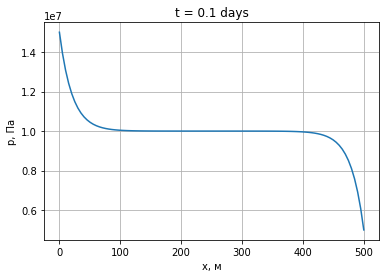

In [ ]:
plotDay(0.1)

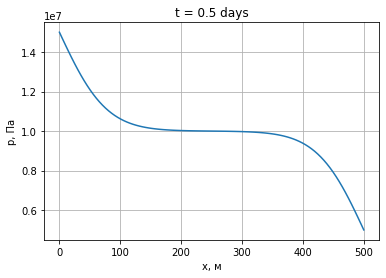

In [ ]:
plotDay(0.5)

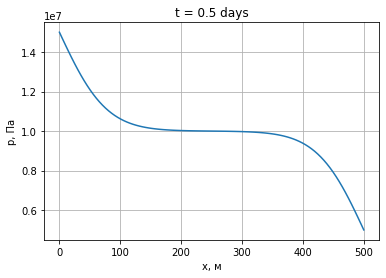

In [ ]:
plotDay(0.5)

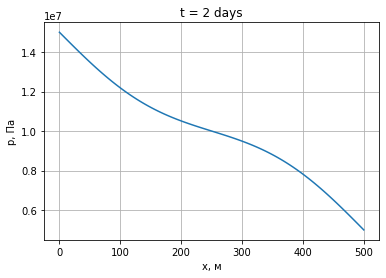

In [ ]:
plotDay(2)

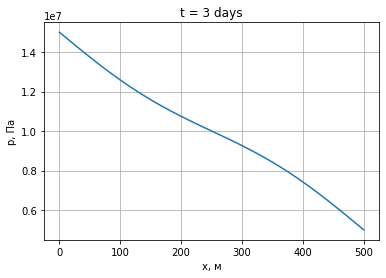

In [ ]:
plotDay(3)

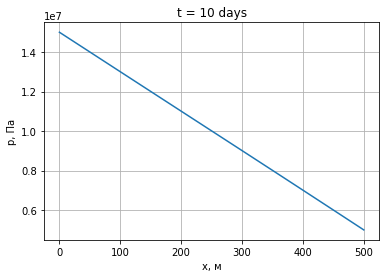

In [ ]:
plotDay(10)